Dataset link: https://www.kaggle.com/datasets/arindamsahoo/social-media-users

#About Dataset
This dataset contains information about users for a social media friend recommendation project. It includes fields such as UserID, Name, Gender, Date of Birth (DOB), Interests, City, and Country. The dataset aims to capture diverse user profiles and their characteristics in terms of personal information, interests, and geographical locations.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
data = pd.read_csv('/content/SocialMediaUsersDataset.csv',index_col=0)
data.head()

,Name,Gender,DOB,Interests,City,Country
UserID,,,,,,
1,Jesse Lawhorn,Female,1958-10-15,"'Movies', 'Fashion', 'Fashion', 'Books'",Sibolga,Indonesia
2,Stacy Payne,Female,2004-07-21,"'Gaming', 'Finance and investments', 'Outdoor ...",Al Abyār,Libya
3,Katrina Nicewander,Female,2000-02-07,"'DIY and crafts', 'Music', 'Science', 'Fashion'",Wādī as Sīr,Jordan
4,Eric Yarbrough,Male,1985-04-14,"'Outdoor activities', 'Cars and automobiles'",Matera,Italy
5,Daniel Adkins,Female,1955-09-18,"'Politics', 'History'",Biruaca,Venezuela


##Checking general information about the data

In [ ]:
data.shape

(100000, 6)

In [ ]:
data.columns

Index(['Name', 'Gender', 'DOB', 'Interests', 'City', 'Country'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1 to 100000
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Name       100000 non-null  object
 1   Gender     100000 non-null  object
 2   DOB        100000 non-null  object
 3   Interests  100000 non-null  object
 4   City       100000 non-null  object
 5   Country    100000 non-null  object
dtypes: object(6)
memory usage: 5.3+ MB


In [ ]:
data.isna().sum()

Name         0
Gender       0
DOB          0
Interests    0
City         0
Country      0
dtype: int64

##Analysis of each column

In [ ]:
# analysis of the gender column
data.Gender.value_counts()

Male      50069
Female    49931
Name: Gender, dtype: int64

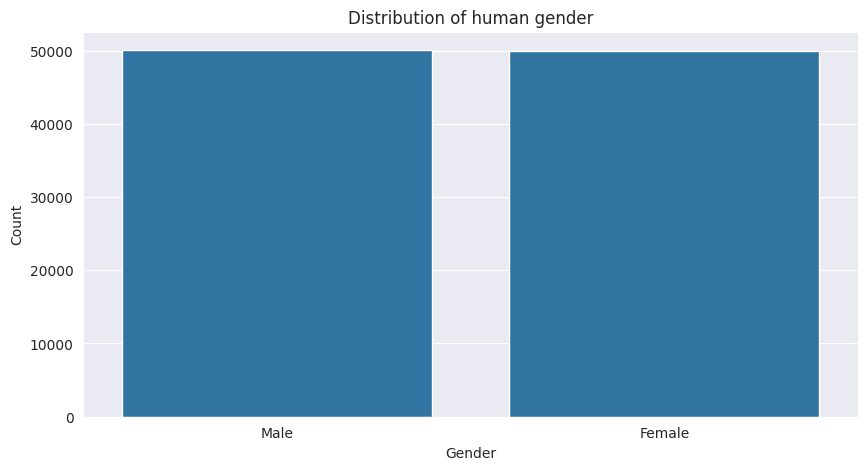

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(data.Gender.value_counts())
plt.title('Distribution of human gender')
plt.xlabel('Gender')
plt.ylabel('Count');

In [ ]:
# analysis of the Date of Birth (DOB) column
data.DOB

UserID
1         1958-10-15
2         2004-07-21
3         2000-02-07
4         1985-04-14
5         1955-09-18
             ...    
99996     1983-07-31
99997     1954-05-20
99998     1975-06-06
99999     1959-11-16
100000    1988-07-29
Name: DOB, Length: 100000, dtype: object

In [ ]:
data.DOB = pd.to_datetime(data.DOB)

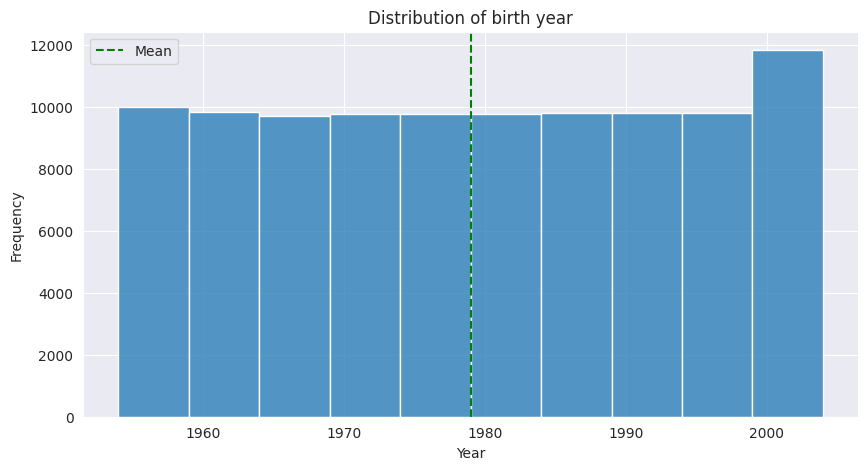

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data.DOB.dt.year, bins=10)
plt.axvline(data.DOB.dt.year.mean(), color='green', linestyle='--', label='Mean')
plt.legend()
plt.title('Distribution of birth year')
plt.xlabel('Year')
plt.ylabel('Frequency');

In [ ]:
# analysis of the Interests column
data.Interests

UserID
1                   'Movies', 'Fashion', 'Fashion', 'Books'
2         'Gaming', 'Finance and investments', 'Outdoor ...
3           'DIY and crafts', 'Music', 'Science', 'Fashion'
4              'Outdoor activities', 'Cars and automobiles'
5                                     'Politics', 'History'
                                ...                        
99996                                      'DIY and crafts'
99997     'Cars and automobiles', 'Cooking', 'Outdoor ac...
99998            'Business and entrepreneurship', 'Cooking'
99999     'Gaming', 'Business and entrepreneurship', 'Fa...
100000                                   'Politics', 'Pets'
Name: Interests, Length: 100000, dtype: object

In [ ]:
def split_interests(interests):
    return list(set(re.findall(r"'([^']+)'", interests)))

In [ ]:
data['Interests'] = data['Interests'].apply(split_interests)

In [ ]:
data.Interests

UserID
1                                  [Movies, Fashion, Books]
2         [Finance and investments, Gaming, Outdoor acti...
3                 [Science, Fashion, DIY and crafts, Music]
4                [Cars and automobiles, Outdoor activities]
5                                       [History, Politics]
                                ...                        
99996                                      [DIY and crafts]
99997     [Outdoor activities, Cars and automobiles, Coo...
99998              [Business and entrepreneurship, Cooking]
99999     [Business and entrepreneurship, Photography, G...
100000                                     [Politics, Pets]
Name: Interests, Length: 100000, dtype: object

In [ ]:
from collections import Counter

interests_list = []
for interests in data['Interests']:
    interests_list.extend(interests)

interests_counter = Counter(interests_list)
top_interests = interests_counter.most_common(10)
top_interests

[('Fashion', 18400),
 ('Cooking', 9740),
 ('Pets', 9699),
 ('Movies', 9678),
 ('Gaming', 9657),
 ('Fitness', 9657),
 ('Cars and automobiles', 9602),
 ('Business and entrepreneurship', 9600),
 ('Books', 9585),
 ('Social causes and activism', 9578)]

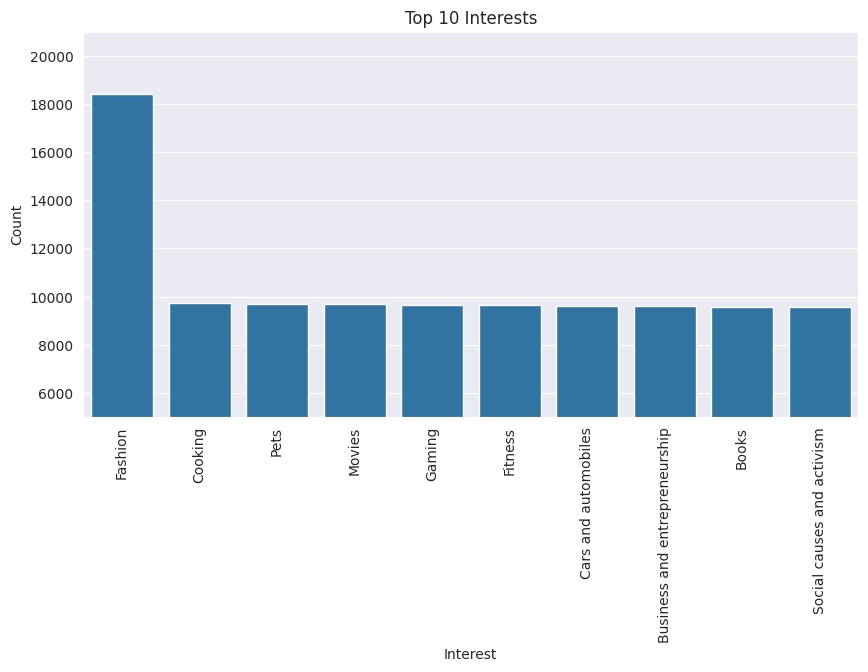

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=[interest[0] for interest in top_interests], y=[interest[1] for interest in top_interests])
plt.title('Top 10 Interests')
plt.ylim([5000, 21000])
plt.xticks(rotation=90)
plt.xlabel('Interest')
plt.ylabel('Count');

In [ ]:
from itertools import combinations

pairs_list = []
for interests in data['Interests']:
     pairs_list.append(list(combinations(interests, 2)))

pairs_list = list(filter(lambda x: x is not None, pairs_list))
pairs_list = [item for sublist in pairs_list for item in sublist]
pairs_counter = Counter(pairs_list)
top_pairs = pairs_counter.most_common(10)
print(f"Interests that are shared in common:")
top_pairs

Interests that are shared in common:


[(('Fitness', 'Fashion'), 1626),
 (('Finance and investments', 'Fashion'), 1621),
 (('Movies', 'Fashion'), 1614),
 (('Health and wellness', 'Fashion'), 1601),
 (('Nature', 'Fashion'), 1588),
 (('History', 'Fashion'), 1550),
 (('Science', 'Fashion'), 1522),
 (('Parenting and family', 'Fashion'), 1514),
 (('Social causes and activism', 'Fashion'), 1496),
 (('Gardening', 'Fashion'), 1486)]

In [ ]:
# analysis of the City column
data.City.unique()

array(['Sibolga', 'Al Abyār', 'Wādī as Sīr', ..., 'Mudhol', 'Shirone',
       'Tepotzotlán'], dtype=object)

In [ ]:
len(data.City.unique())

24452

In [ ]:
data.City.value_counts()

Springfield      37
Victoria         35
Santa Cruz       34
San Fernando     33
San Francisco    31
                 ..
Rondebosch        1
Lutuhyne          1
Chuzhou           1
Safonovo          1
Tepotzotlán       1
Name: City, Length: 24452, dtype: int64

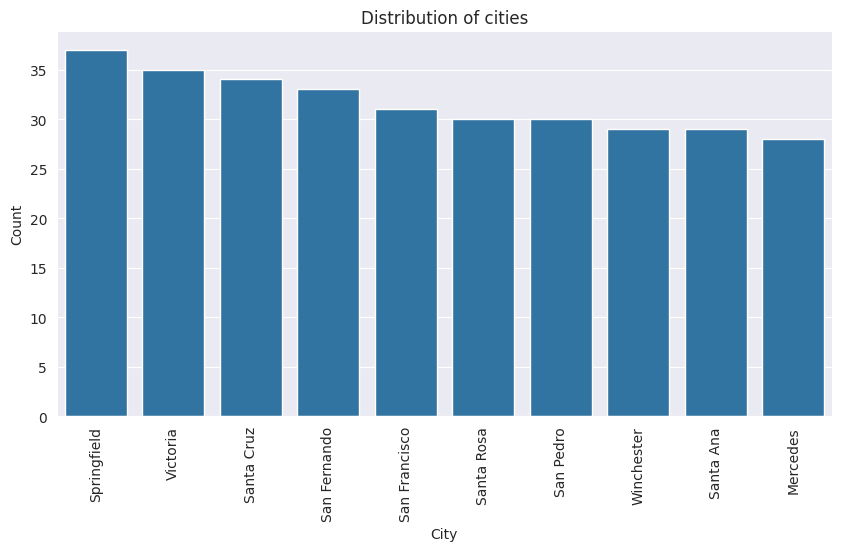

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(data.City.value_counts().sort_values(ascending=False).head(10))
plt.xticks(rotation=90)
plt.title('Distribution of cities')
plt.xlabel('City')
plt.ylabel('Count');

In [ ]:
# analysis of the Country column
data.Country.unique()

array(['Indonesia', 'Libya', 'Jordan', 'Italy', 'Venezuela',
       'United States', 'United Kingdom', 'Sudan', 'Saudi Arabia',
       'India', 'Russia', 'Belgium', 'China', 'Brazil', 'Poland', 'Japan',
       'North Korea', 'Colombia', 'Sri Lanka', 'Spain', 'Germany',
       'Bangladesh', 'Greece', 'Syria', 'Ethiopia', 'France', 'Nigeria',
       'Australia', 'Malaysia', 'Czechia', 'Thailand', 'Canada',
       'Uzbekistan', 'Israel', 'Mauritania', 'Cuba',
       'Democratic Republic of the Congo', 'Egypt', 'Romania',
       'New Caledonia', 'Iran', 'Argentina', 'Mexico', 'Hungary',
       'Belarus', 'Reunion', 'Guyana', 'Chile', 'Turkey', 'South Africa',
       'Pakistan', 'Iraq', 'Cameroon', 'Netherlands', 'Ecuador',
       'Madagascar', 'Serbia', 'Philippines', 'Afghanistan', 'Ireland',
       'North Macedonia', 'Papua New Guinea', 'South Korea',
       'South Sudan', 'Sierra Leone', 'New Zealand', 'Malawi', 'Ukraine',
       'Sweden', 'Azerbaijan', 'Norway', 'Portugal',
       'Tur

In [ ]:
data.Country.value_counts()

United States          12311
India                   9399
China                   7381
Brazil                  4643
Russia                  4254
                       ...  
Antigua and Barbuda        2
Isle of Man                2
Saint Lucia                1
American Samoa             1
Saint Martin               1
Name: Country, Length: 244, dtype: int64

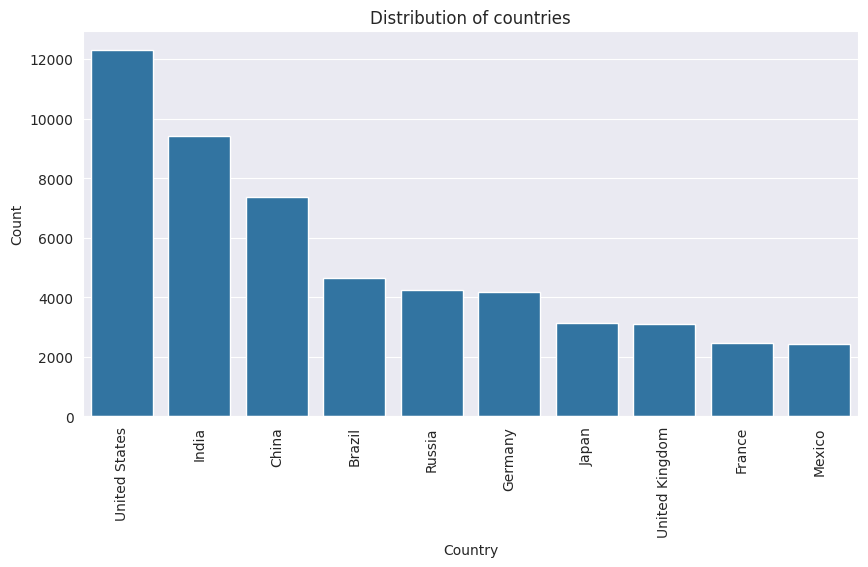

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data.Country.value_counts().sort_values(ascending=False).head(10))
plt.xticks(rotation=90)
plt.title('Distribution of countries')
plt.xlabel('Country')
plt.ylabel('Count');

##Analyzing the relationship between variables

In [ ]:
# analysis the relationship between Gender and Interests
data_female = data[data.Gender == 'Female']
data_male = data[data.Gender == 'Male']

female_interests = data_female['Interests'].explode().value_counts()
male_interests = data_male['Interests'].explode().value_counts()

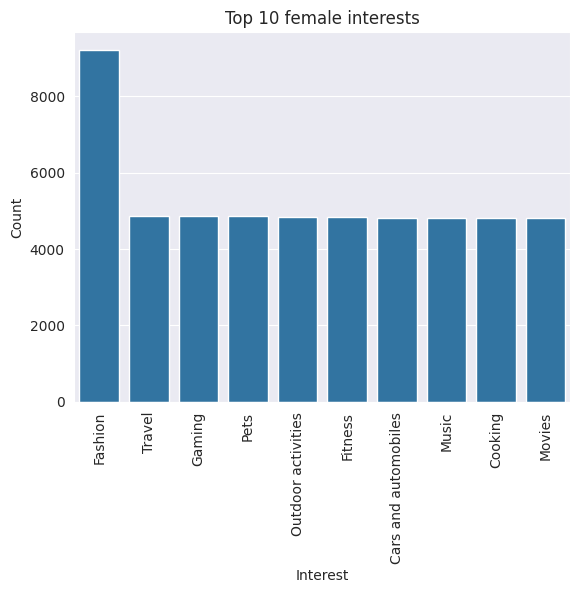

In [ ]:
sns.barplot(female_interests.sort_values(ascending=False).head(10))
plt.xticks(rotation=90)
plt.title('Top 10 female interests')
plt.xlabel('Interest')
plt.ylabel('Count');

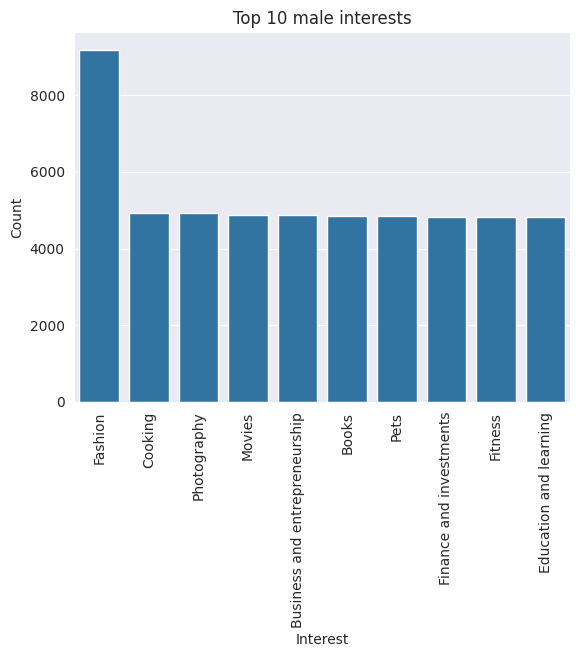

In [ ]:
sns.barplot(male_interests.sort_values(ascending=False).head(10))
plt.xticks(rotation=90)
plt.title('Top 10 male interests')
plt.xlabel('Interest')
plt.ylabel('Count');

In [ ]:
# analysis the relationship between Age and Interests
data['Age'] = data['DOB'].dt.year
data['Age'] = data['Age'].apply(lambda x: 2023 - x)

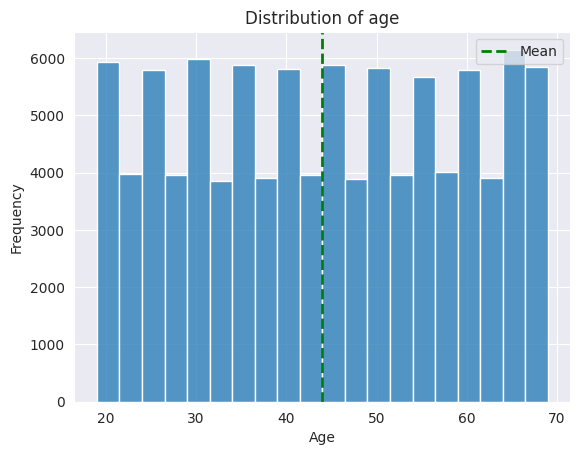

In [ ]:
sns.histplot(data['Age'], bins=20)
plt.axvline(data['Age'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.legend(['Mean'])
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency');

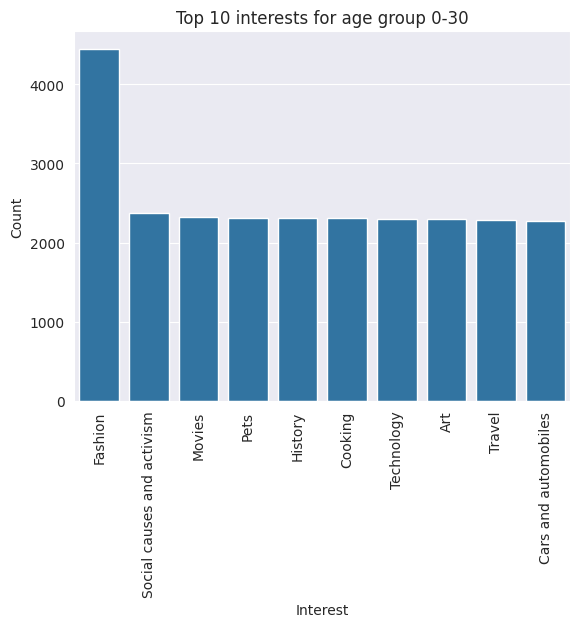

In [ ]:
sns.barplot(data.loc[data["Age"] <= 30, 'Interests'].explode().value_counts().sort_values(ascending=False).head(10))
plt.title('Top 10 interests for age group 0-30')
plt.xticks(rotation=90)
plt.xlabel('Interest')
plt.ylabel('Count');

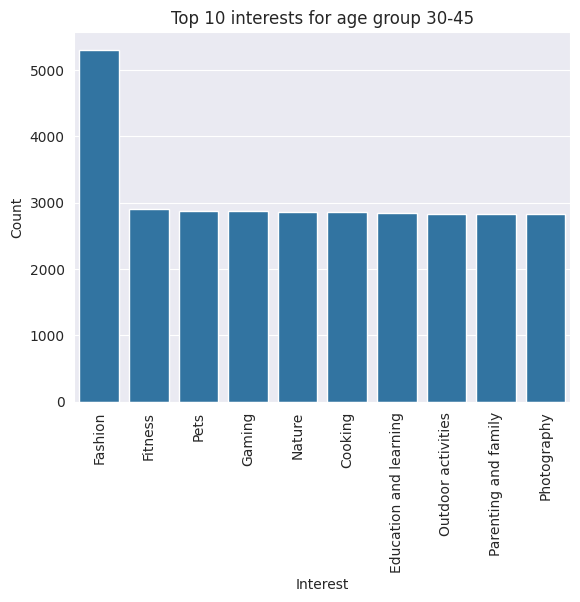

In [ ]:
sns.barplot(data.loc[(data["Age"] > 30) & (data["Age"] <= 45) , 'Interests'].explode().value_counts().sort_values(ascending=False).head(10))
plt.title('Top 10 interests for age group 30-45')
plt.xticks(rotation=90)
plt.xlabel('Interest')
plt.ylabel('Count');

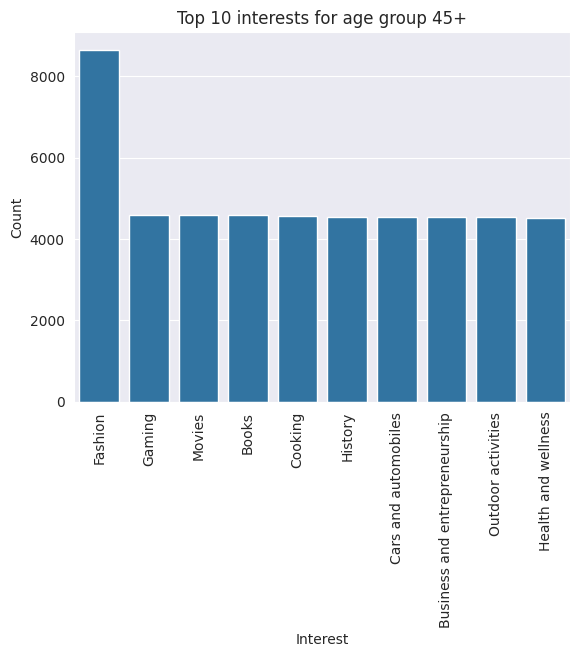

In [ ]:
sns.barplot(data.loc[data["Age"] > 45, 'Interests'].explode().value_counts().sort_values(ascending=False).head(10))
plt.title('Top 10 interests for age group 45+')
plt.xticks(rotation=90)
plt.xlabel('Interest')
plt.ylabel('Count');

In [ ]:
# analysis the relationship between Country and Interests
interests_by_country = data['Interests'].explode().groupby(data['Country']).value_counts()

In [ ]:
interests_by_country

Country      Interests                    
Afghanistan  Fashion                          29
             Business and entrepreneurship    23
             Finance and investments          23
             Music                            23
             Pets                             23
                                              ..
Zimbabwe     Pets                              9
             Beauty                            8
             Movies                            8
             Music                             7
             Science                           5
Name: Interests, Length: 5643, dtype: int64

In [ ]:
countries = data.Country.value_counts().sort_values(ascending=False).head(10)

In [ ]:
countries

United States     12311
India              9399
China              7381
Brazil             4643
Russia             4254
Germany            4174
Japan              3148
United Kingdom     3086
France             2458
Mexico             2445
Name: Country, dtype: int64

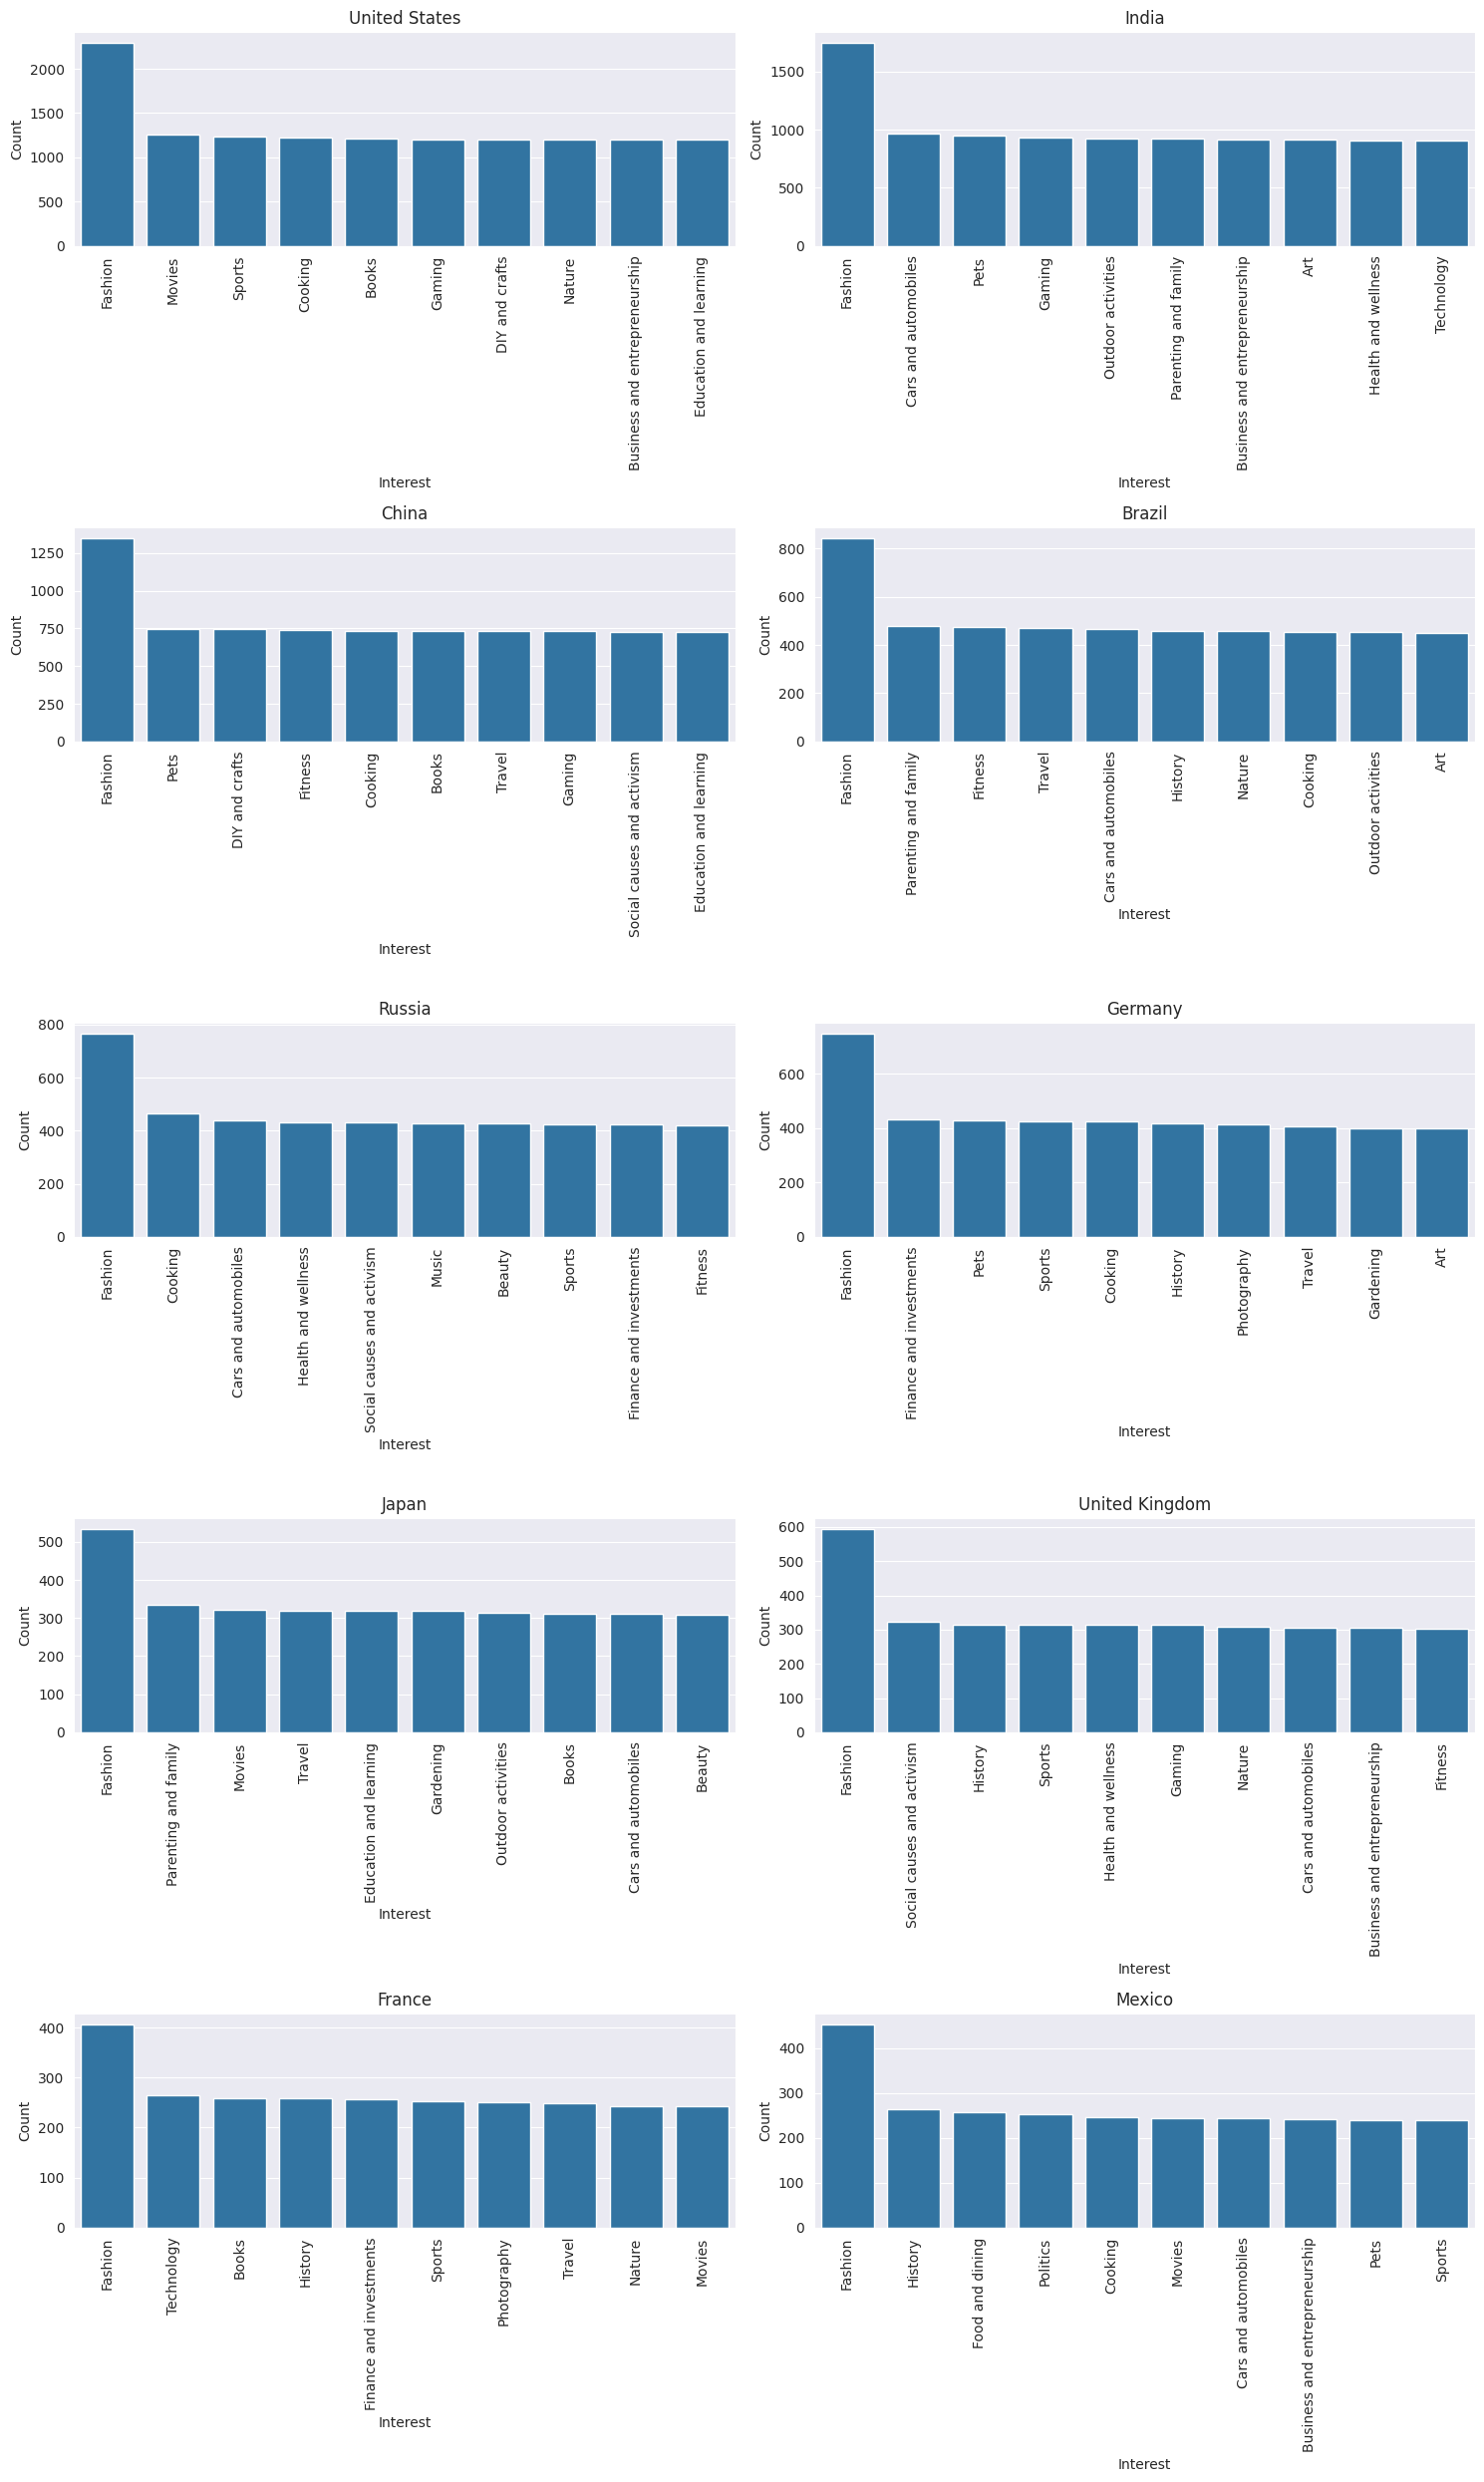

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(15, 25), gridspec_kw={'height_ratios': [2, 2, 2, 2, 2], 'width_ratios': [1, 1]})
for i, country in enumerate(countries.index):
    ax = axes[i // 2, i % 2]
    sns.barplot(interests_by_country[country].sort_values(ascending=False).head(10), ax=ax)
    ax.set_title(country)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel('Interest')
    ax.set_ylabel('Count')


plt.tight_layout();

In [ ]:
for element in countries.index:
  print(element, interests_by_country[element].sort_values(ascending=False).head(10))

United States Interests
Fashion                          2298
Movies                           1256
Sports                           1234
Cooking                          1220
Books                            1209
Gaming                           1206
DIY and crafts                   1202
Nature                           1202
Business and entrepreneurship    1198
Education and learning           1198
Name: Interests, dtype: int64
India Interests
Fashion                          1750
Cars and automobiles              968
Pets                              946
Gaming                            934
Outdoor activities                924
Parenting and family              921
Business and entrepreneurship     918
Art                               913
Health and wellness               905
Technology                        905
Name: Interests, dtype: int64
China Interests
Fashion                       1351
Pets                           746
DIY and crafts                 745
Fitness            

##Conclusions about the relationship between country and interests:

In analyzing the interests of users across multiple countries, several patterns emerge that illustrate both commonalities and distinctions in the preferences of diverse populations.

###Similarities:

1. Fashion: Fashion emerges as a shared interest across various countries, indicating a global appreciation for style and trends.

2. Cooking: The interest in cooking is prevalent among many countries, underscoring a universal enjoyment of culinary arts and food culture.

3. Gaming: Gaming garners significant interest in multiple regions, reflecting the widespread popularity of gaming culture and entertainment worldwide.

4. Books: Reading interests are evident across different countries, suggesting a global affinity for literature and knowledge.

5. Sports: Enthusiasm for sports is widespread, demonstrating a passion for athletic activities and competitions across diverse populations.

###Differences:

1. Specific Interests: Each country exhibits unique interests that cater to its population, ranging from automotive enthusiasm to parenting and family topics.

2. Cultural Influences: Certain interests reflect cultural nuances and preferences within each country, influenced by historical, societal, and environmental factors.

3. Economic Considerations: Variances in interests related to business and entrepreneurship highlight disparities in entrepreneurial activities and economic landscapes.

4. Historical and Political Significance: Interests in history and politics may be more pronounced in countries with rich historical backgrounds or active political environments.

5. Technological Trends: Interest in technology-related topics reflects advancements and contributions in the technology sector, showcasing varying levels of technological adoption and innovation.

Understanding these similarities and differences provides valuable insights into the preferences and behaviors of global populations, informing strategic decision-making in marketing, cultural exchange, and international relations.
